In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import regex as re 

# Naive Bayes
- Naive Bayes is the simplest and fastest classification algorithm for a large chunk of data. In various applications such as spam filtering, text classification, sentiment analysis, and recommendation systems, Naive Bayes classifier is used successfully.
- The Naive Bayes classification technique is a simple and powerful classification task in machine learning. The use of Bayes’ theorem with a strong independence assumption between the features is the basis for naive Bayes classification. When used for textual data analysis, such as Natural Language Processing, the Naive Bayes classification yields good results.

### Intuition
- In practice, the Bayes theorem is applied by the Naive Bayes classifier. The power of Bayes’ theorem is brought to machine learning with this classifier.
- The Bayes theorem is used by the Naive Bayes Classifier to forecast membership probabilities for each class, such as the likelihood that a given record or data point belongs to that class. The most likely class is defined as the one having the highest probability. The Maximum A Posteriori is another name for this (MAP)
- For a hypothesis with two occurrences A and B, the MAP is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A)
- P (B) stands for probability of evidence. It’s utilized to make the outcome more normal. It has no effect on the outcome if it is removed.
- All of the features in the Naive Bayes Classifier are assumed to be unrelated. A feature’s presence or absence has no bearing on the presence or absence of other features.

#### Types of Naive Bayes algorithm
There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

- Gaussian Naïve Bayes
- Multinomial Naïve Bayes
- Bernoulli Naïve Bayes

#### Applications of Naive Bayes algorithm
Naive Bayes is one of the most straightforward and fast classification algorithms. It is very well suited for large volumes of data. It is successfully used in various applications such as :

- Spam filtering
- Text classification
- Sentiment analysis
- Recommender systems

It uses the Bayes theorem of probability for the prediction of unknown classes.

For more Github: https://github.com/saisubhasish

In [ ]:
# Reading data

df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2154,ham,Oh god i am happy to see your message after 3 ...,NaN,NaN,NaN
2790,spam,UÛªve Bin Awarded å£50 to Play 4 Instant Cash...,NaN,NaN,NaN
106,ham,"Aight, I'll hit you up when I get some cash",NaN,NaN,NaN
2104,ham,Anyway seriously hit me up when you're back be...,NaN,NaN,NaN
4786,ham,ÌÏ thk of wat to eat tonight.,NaN,NaN,NaN


In [ ]:
df.shape  

(5572, 5)

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols

#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
nltk.download('stopwords')  ## Stop the unused words
                            ## Stop words are words that are so common they are basically ignored by typical tokenizers.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2126,ham,You do got a shitload of diamonds though,NaN,NaN,NaN
3083,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,NaN,NaN,NaN
2725,ham,No. But we'll do medical missions to nigeria,NaN,NaN,NaN
1744,spam,Someone has conacted our dating service and en...,NaN,NaN,NaN
2923,ham,Thts god's gift for birds as humans hav some n...,NaN,NaN,NaN


In [ ]:
# renaming the cols

df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df.sample(5)

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
4583,ham,Noooooooo please. Last thing I need is stress....,NaN,NaN,NaN
5478,ham,No probably &lt;#&gt; %.,NaN,NaN,NaN
5382,ham,"I can make it up there, squeezed &lt;#&gt; b...",NaN,NaN,NaN
3792,ham,Hey are you angry with me. Reply me dr.,NaN,NaN,NaN
2537,ham,That's y we haf to combine n c how lor...,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()    # To encode the column as numerical

In [ ]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Checking missing values

df.isnull().sum()

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# checking for duplicate values

df.duplicated().sum()

403

In [ ]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [ ]:
# Shape of the data

df.shape

(5169, 5)

## 2.EDA

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Classes of the output column

df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

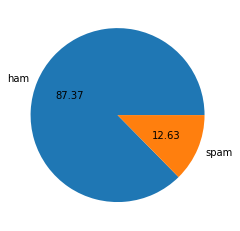

In [ ]:
# Pie chart


plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Report:

Label is imbalanced

In [ ]:
## ''punkt'' tokenizer divides a text into a list of sentences by using an unsupervised algorithm 
## to build a model for abbreviation words, collecations, and words that start sentences.

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
## Getting number of characters in each message

df['num_characters'] = df['message'].apply(len)

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [ ]:
# Getting the number of words

df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [ ]:
## Getting umber of sentences in each message using "punkt"

df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [ ]:
# Description of the numerical data

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# Getting description of ham

df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#  Getting description of spam

df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


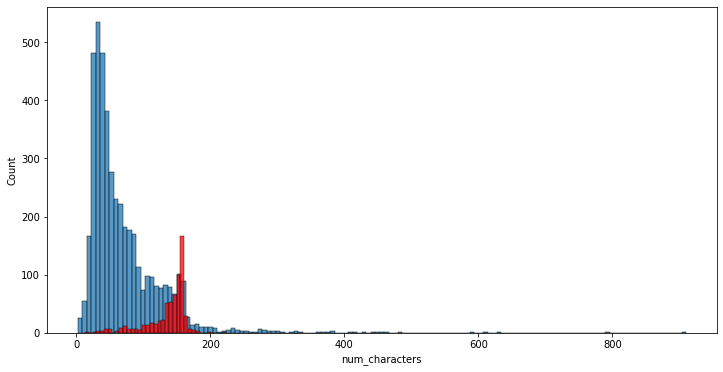

In [ ]:
# Histogram for num_characters with respect to classes in label column

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

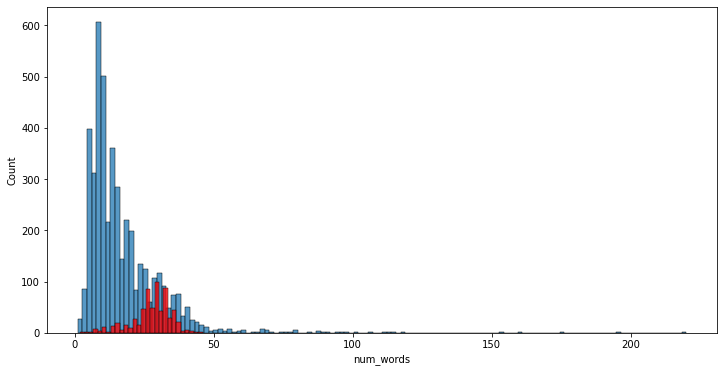

In [ ]:
# Histogram for num_words with respect to classes in label column

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

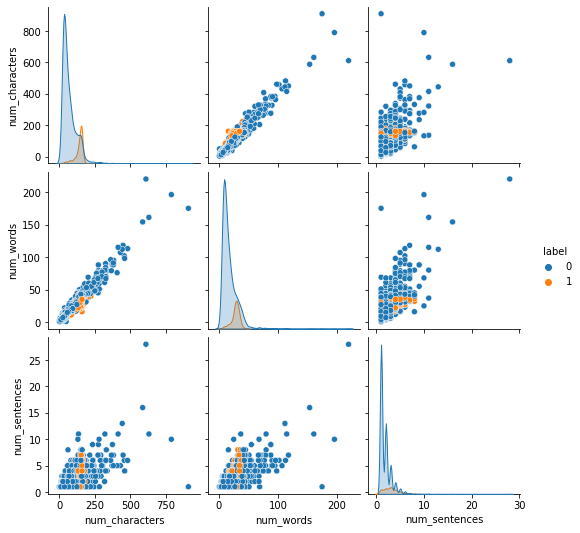

In [ ]:
# Pair-plot

sns.pairplot(df,hue='label')

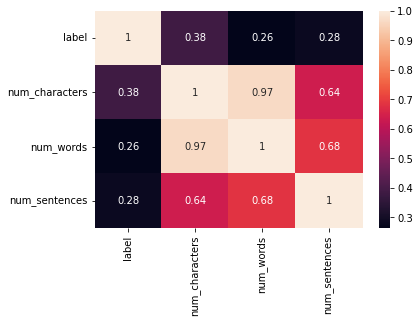

In [ ]:
# Heatmap

sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()  ## The Porter stemming algorithm (or 'Porter stemmer') is a process for removing 
                      ## the commoner morphological and inflexional endings from words in English.

In [ ]:
df['message'][18]

'Fine if thatåÕs the way u feel. ThatåÕs the way its gota b'

In [ ]:
# Function to get transformed text using lower(), "punkt tokenizer", alnum(), stopwords(), punctuation, stem()

def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['message'][18]

'Fine if thatåÕs the way u feel. ThatåÕs the way its gota b'

In [ ]:
ps.stem('loving')    ## Getting the root word

'love'

In [ ]:
# Transforming the dataset

df['transformed_text'] = df['message'].apply(transform_text)

In [ ]:
df['message'][1]

'Ok lar... Joking wif u oni...'

Report:

Unnecessary letters are still there, we will remove then using regex.

In [ ]:
from wordcloud import WordCloud # A word cloud (also known as a tag cloud) is a visual representation of words.

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# Generating text when label is 'spam'

spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

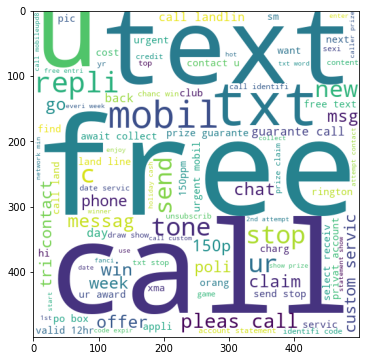

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
# Generating text when label is 'ham'

ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

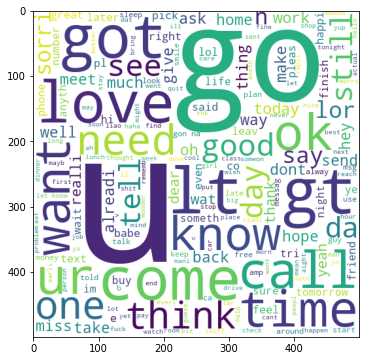

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [ ]:
# Cleaning and storing spam sentances in list

spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        word = re.sub('[^a-zA-Z]', ' ', word)     # Except 'a-zA-Z' it will remove all
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


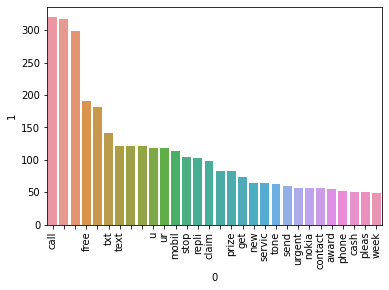

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Cleaning and storing ham sentances in list

ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        word = re.sub('[^a-zA-Z]', ' ', word)     # Except 'a-zA-Z' it will remove all
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35394

In [ ]:
# Text Vectorization
# using Bag of Words

df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


## 4. Model Building
We will test our dataset with SVM and Naive Bayes as they works well with textual data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()                      ## Countvectorizer is a method to convert text to numerical data.
tfidf = TfidfVectorizer(max_features=3000)  ## TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.
                                            ## tf-idf is used as a weighting factor in searches of information retrieval, text mining, and user modeling. 
                                            ## The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [ ]:
# Converting input data to array

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
GaussianNB      ##  used when features are not discreet.
MultinomialNB   ##  used when features follow a multinomial distribution.
BernoulliNB     ##  used when features are of the boolean type.

sklearn.naive_bayes.BernoulliNB

#### Report:
- As our feature have values in array form(0/1) and there was no boolean value we won't proceed with GaussianNB and BernoulliNB
- There are multiple columns on which the output label is dependent, so we will go with MultinomialNB

In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()

In [ ]:
clfs = {
    'SVC' : svc,
    'MNB': mnb,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,MNB,0.970986,1.00000
0,SVC,0.975822,0.97479


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")  ## Pandas melt() function is used to change the DataFrame format from wide to long. 
                                                                  ## It's used to create a specific format of the DataFrame object where one or more columns work as identifiers. 
                                                                  ## All the remaining columns are treated as values and unpivoted to the row axis and only two columns - variable and value.

In [ ]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.970986
1,SVC,Accuracy,0.975822
2,MNB,Precision,1.000000
3,SVC,Precision,0.974790


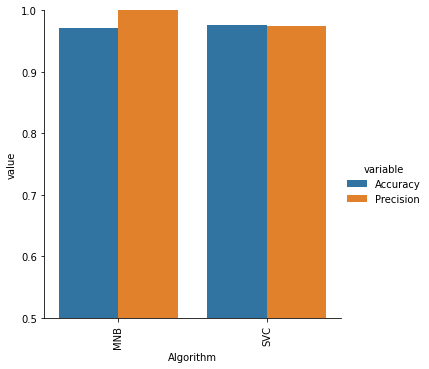

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# TO improve model accuracy
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,MNB,0.970986,1.00000,0.970986,1.00000,0.970986,1.00000,0.970986,1.00000
1,SVC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479


Report:

- Multinomial Naive Bayes gives the best score.

In [ ]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))